I want to take a look at the three transactions data sets and see what the difference is between them.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
import seaborn as sns


%matplotlib inline
plt.style.use('seaborn-dark')

In [2]:
%ls data | grep transaction

ls: data: No such file or directory


In [3]:
transactions = pd.read_csv(
    '../data/transaction_items_full_clean.csv', 
    delimiter=","
)
transactions["Time"] = pd.to_datetime(transactions["Time"])
transactions['time_hour'] = pd.DatetimeIndex(transactions['Time']).round("h")

transactions["Time2"] = transactions["Time"]


transactions.set_index("Time", inplace=True)
transactions["Time"] = transactions["Time2"]

print(transactions.shape)
transactions.head(3)

(26748, 23)


,Unnamed: 0,Register Name/Number,Operation Type,Store Code,UPC,Line Item,Department,Supplier,Supplier Code,Cost,...,Subtotal,Discounts,Net Total,Tax,Total Due,Transaction ID,Customer ID,time_hour,Time2,Time
Time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 02:04:00,0,Register 1,SALE,*400000000015,*,Misc Taxable,general,not tracked,NaN,0.00,...,33.0,0.0,33.0,0.0,33.0,B5B298C8-88CD-451D-8ED2-AD3DC5386B9B,48373875,2020-01-01 02:00:00,2020-01-01 02:04:00,2020-01-01 02:04:00
2020-01-01 01:51:00,1,Register 1,SALE,*400000000060,*,Landlocked IPA,beers,not tracked,NaN,0.84,...,20.0,0.0,20.0,0.0,20.0,0FF4F15F-89FB-4F93-B4E5-04EB5B61BDC2,13685111,2020-01-01 02:00:00,2020-01-01 01:51:00,2020-01-01 01:51:00
2020-01-01 01:49:00,2,Register 1,SALE,*400000000060,*,Landlocked IPA,beers,not tracked,NaN,0.84,...,2.5,2.5,0.0,0.0,0.0,C6BADA76-ED6A-4551-BDAA-292CF65F0939,13685111,2020-01-01 02:00:00,2020-01-01 01:49:00,2020-01-01 01:49:00


[]

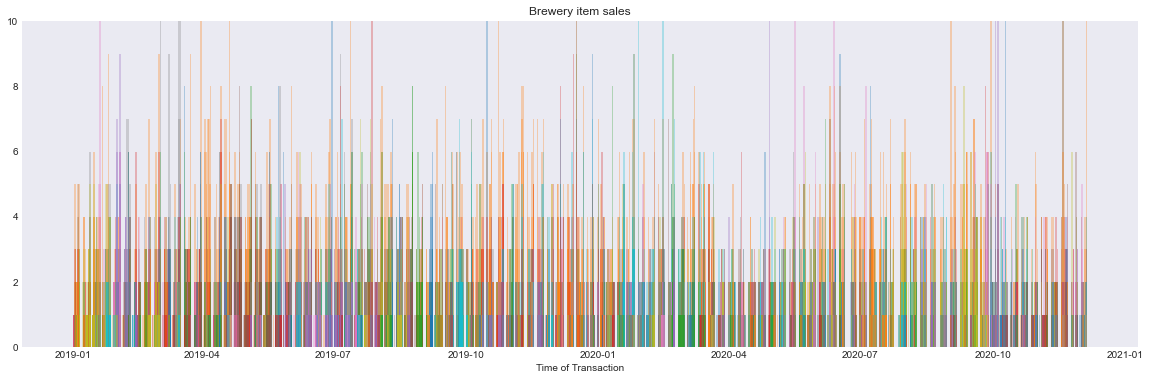

In [4]:
fig, ax = plt.subplots(1,1, figsize=(20,6))

for item in transactions["Line Item"].unique():
    this_item = transactions[transactions["Line Item"]==item]
    ax.bar(this_item["Time"], this_item["Quantity"], label=item, linewidth=1, alpha=.3, width=1)    
    
ax.grid(False)
ax.set_title("Brewery item sales")
# Too many items for a legend
# ax.legend()
ax.set_ylim(0,10)
ax.set_xlabel("Time of Transaction")
ax.plot()

[]

/usr/local/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


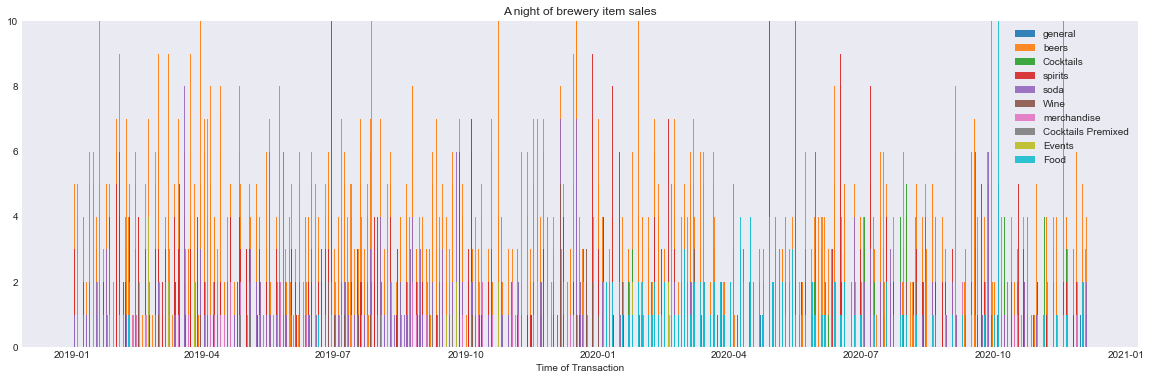

In [5]:
fig, ax = plt.subplots(1,1, figsize=(20,6))

for item in transactions["Department"].unique():
    this_item = transactions[transactions["Department"]==item]
    ax.bar(this_item["Time"], this_item["Quantity"], label=item, linewidth=1, alpha=.9, width=.3)    
    
ax.grid(False)
ax.set_title("A night of brewery item sales")
ax.legend()
ax.set_ylim(0,10)
ax.set_xlabel("Time of Transaction")
ax.plot()

In [6]:
transactions.groupby("Department").sum()

,Unnamed: 0,Cost,Price,Quantity,Modifiers,Subtotal,Discounts,Net Total,Tax,Total Due,Customer ID
Department,,,,,,,,,,,
Cocktails,3791162,1920.34,5723.00,1053.0,-61.00,7517.50,345.58,7171.92,0.0,7171.92,11212906205
Cocktails Premixed,282340,69.15,239.00,40.0,-1.00,245.00,0.00,245.00,0.0,245.00,562953359
Events,669232,1680.00,2704.00,105.0,-280.00,4273.00,654.05,3618.95,0.0,3618.95,917937935
Food,17194404,181.23,14560.00,2700.0,-263.00,16877.50,252.26,16625.24,0.0,16625.24,34031266333
Wine,2660435,1220.80,3118.50,512.0,304.50,4149.00,133.74,4015.26,0.0,4015.26,6051297579
beers,128245023,14984.02,98956.50,27010.0,4671.46,150637.46,17105.75,133531.71,0.0,133531.71,257696925353
general,1608968,5.56,6152.44,298.0,-185.00,6293.94,3.50,6290.44,0.0,6290.44,3946710228
merchandise,2774413,1977.10,6943.00,479.0,195.00,7713.00,371.39,7341.61,0.0,7341.61,6568926570
soda,13276375,1687.87,4990.50,2441.0,785.00,6944.50,658.92,6285.58,0.0,6285.58,27490625235


In [7]:
transactions.groupby("Line Item").sum()

,Unnamed: 0,Cost,Price,Quantity,Modifiers,Subtotal,Discounts,Net Total,Tax,Total Due,Customer ID
Line Item,,,,,,,,,,,
1-color Limited Glass,96893,35.49,84.0,25.0,7.00,107.00,4.00,103.00,0.0,103.00,287387331
12 Foot Beard Jowl Bristle Whiskey,27819,8.40,42.0,11.0,-17.50,59.50,0.00,59.50,0.0,59.50,82110666
1220 Origin Gin,8399,14.14,42.0,9.0,-3.00,51.00,4.50,46.50,0.0,46.50,95795777
19 Crimes The Uprising Red Wine,500850,203.94,742.5,122.0,42.50,942.50,35.08,907.42,0.0,907.42,1418455086
2-color limited glass,60885,30.00,60.0,14.0,0.00,84.00,30.50,53.50,0.0,53.50,136851110
...,...,...,...,...,...,...,...,...,...,...,...
Xicaru Silver 102 Mezcal,71,5.30,14.0,2.0,-7.00,7.00,3.50,3.50,0.0,3.50,27370222
Zaya 16 Years Old Gran Reserva Rum,45100,66.99,232.0,38.0,22.00,326.00,15.00,311.00,0.0,311.00,396868219
Zombie Scottish Ale,219814,78.54,714.0,178.0,10.75,1042.75,114.33,928.42,0.0,928.42,1840672360


In [8]:
sales_by_hour = transactions.groupby(transactions["time_hour"].dt.date).sum()
sales_by_hour.head(3)

,Unnamed: 0,Cost,Price,Quantity,Modifiers,Subtotal,Discounts,Net Total,Tax,Total Due,Customer ID
time_hour,,,,,,,,,,,
2019-01-01,148239,11.66,44.0,9.0,12.0,56.0,4.50,51.50,0.0,51.50,123165999
2019-01-02,772821,58.49,229.5,61.0,12.0,323.0,63.59,259.41,0.0,259.41,643200217
2019-01-03,426569,28.74,145.5,30.0,-4.0,166.0,9.50,156.50,0.0,156.50,355812886


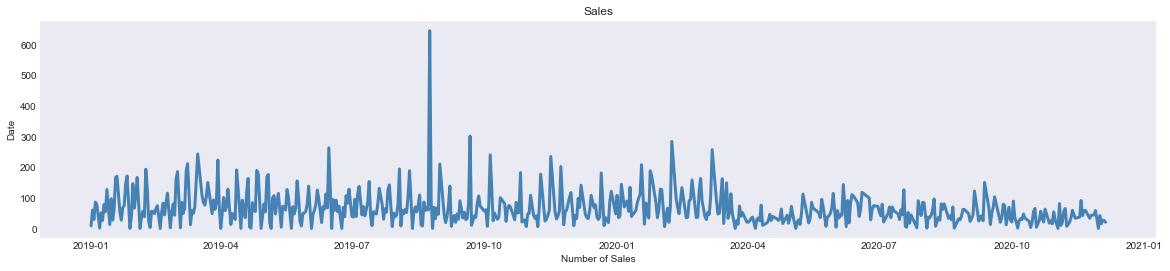

In [13]:
fig, ax = plt.subplots(1,1, figsize=(20,4))
ax.plot("Quantity", data=sales_by_hour, color="steelblue", linewidth=3)
ax.set_title("Sales")
ax.set_xlabel("Number of Sales")
ax.set_ylabel("Date")
ax.plot();


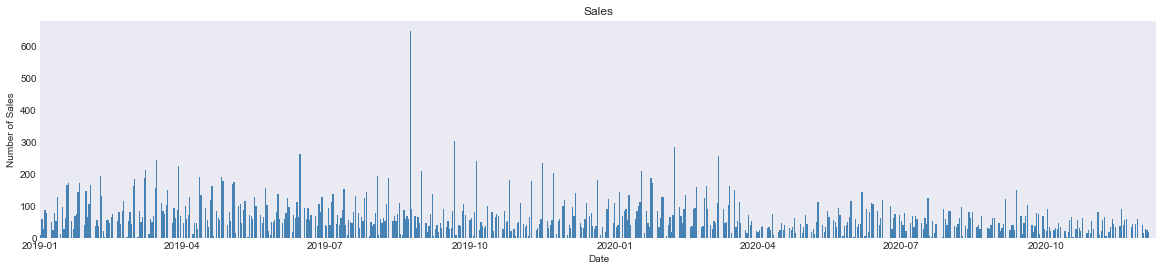

In [14]:
import datetime

fig, ax = plt.subplots(1,1, figsize=(20,4))
x = sales_by_hour
y = sales_by_hour

ax.bar(height=sales_by_hour[:]["Quantity"], x =  sales_by_hour.index[:], color="steelblue")

ax.set_title("Sales")
ax.set_ylabel("Number of Sales")
ax.set_xlabel("Date")

ax.set_xlim([datetime.date(2019, 1, 1), datetime.date(2020, 12, 10)])

ax.plot();


## From here we want to get a line chart of individual brews over the same period of time and start looking at indiviidual beers in general.

In [15]:
beer_transactions = transactions[transactions["Department"] == "beers"]

In [16]:
beers = beer_transactions["Line Item"].unique()
print(f"There are { len(beers) } beers.")

There are 99 beers.


# First we try to plot by beer, but the graph is too messy to tell anything.


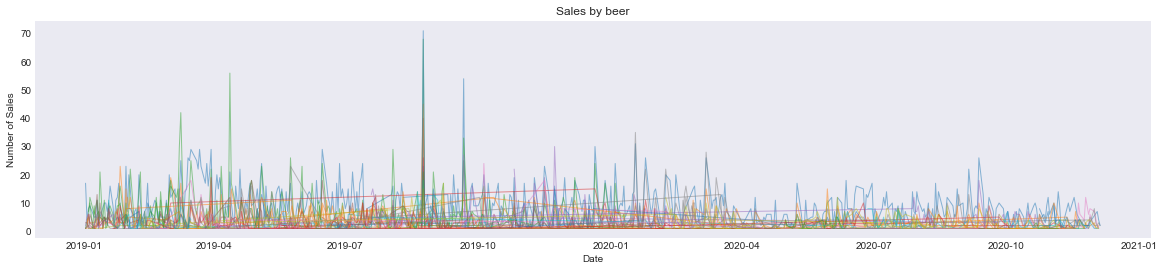

In [17]:
fig, ax = plt.subplots(1,1, figsize=(20,4))
for beer in beers:
    this_beer = beer_transactions[beer_transactions["Line Item"] == beer]
    sales_by_hour = this_beer.groupby(this_beer["time_hour"].dt.date).count()
    
    this_beer.head(2)
    ax.plot("Quantity", data=sales_by_hour, linewidth=1, alpha=.5)
ax.set_title("Sales by beer")
ax.set_ylabel("Number of Sales")
ax.set_xlabel("Date")
ax.plot();


## Let's get an ordered count of the most popular beers and see if we can classify them

In [36]:
beer_counts = beer_transactions.groupby("Line Item").sum()
beer_counts = beer_counts.sort_values('Quantity', ascending=False)
beer_counts.tail(3)

,Unnamed: 0,Cost,Price,Quantity,Modifiers,Subtotal,Discounts,Net Total,Tax,Total Due,Customer ID
Line Item,,,,,,,,,,,
Crabtree Chapter 2 Au8 Belgian Tripel,19944,0.00,16.0,2.0,0.0,16.0,0.0,16.0,0.0,16.0,27370222
Crane Tea Weiss,29514,16.50,30.0,2.0,0.0,30.0,0.0,30.0,0.0,30.0,27370222
Black and Tan Pack,3582,3.65,16.0,1.0,0.0,16.0,0.0,16.0,0.0,16.0,13685111


## At this point we narrow the field to beers brewed at this brewery or at least have more than a certain amount of sales

In [42]:
beer_counts = beer_counts[beer_counts['Quantity'] > 40]
print(beer_counts.shape)
beer_counts.tail(3)

(61, 11)


,Unnamed: 0,Cost,Price,Quantity,Modifiers,Subtotal,Discounts,Net Total,Tax,Total Due,Customer ID
Line Item,,,,,,,,,,,
Mark of the Beast Quad,405147,52.07,328.0,54.0,-12.0,420.0,60.00,360.00,0.0,360.00,570538352
Belgian Trippel,84181,34.65,292.5,51.0,30.9,362.4,39.54,322.86,0.0,322.86,669852073
Estrella Daura Damm Lager,275364,33.00,165.0,49.0,-5.0,240.0,16.00,224.00,0.0,224.00,451608663


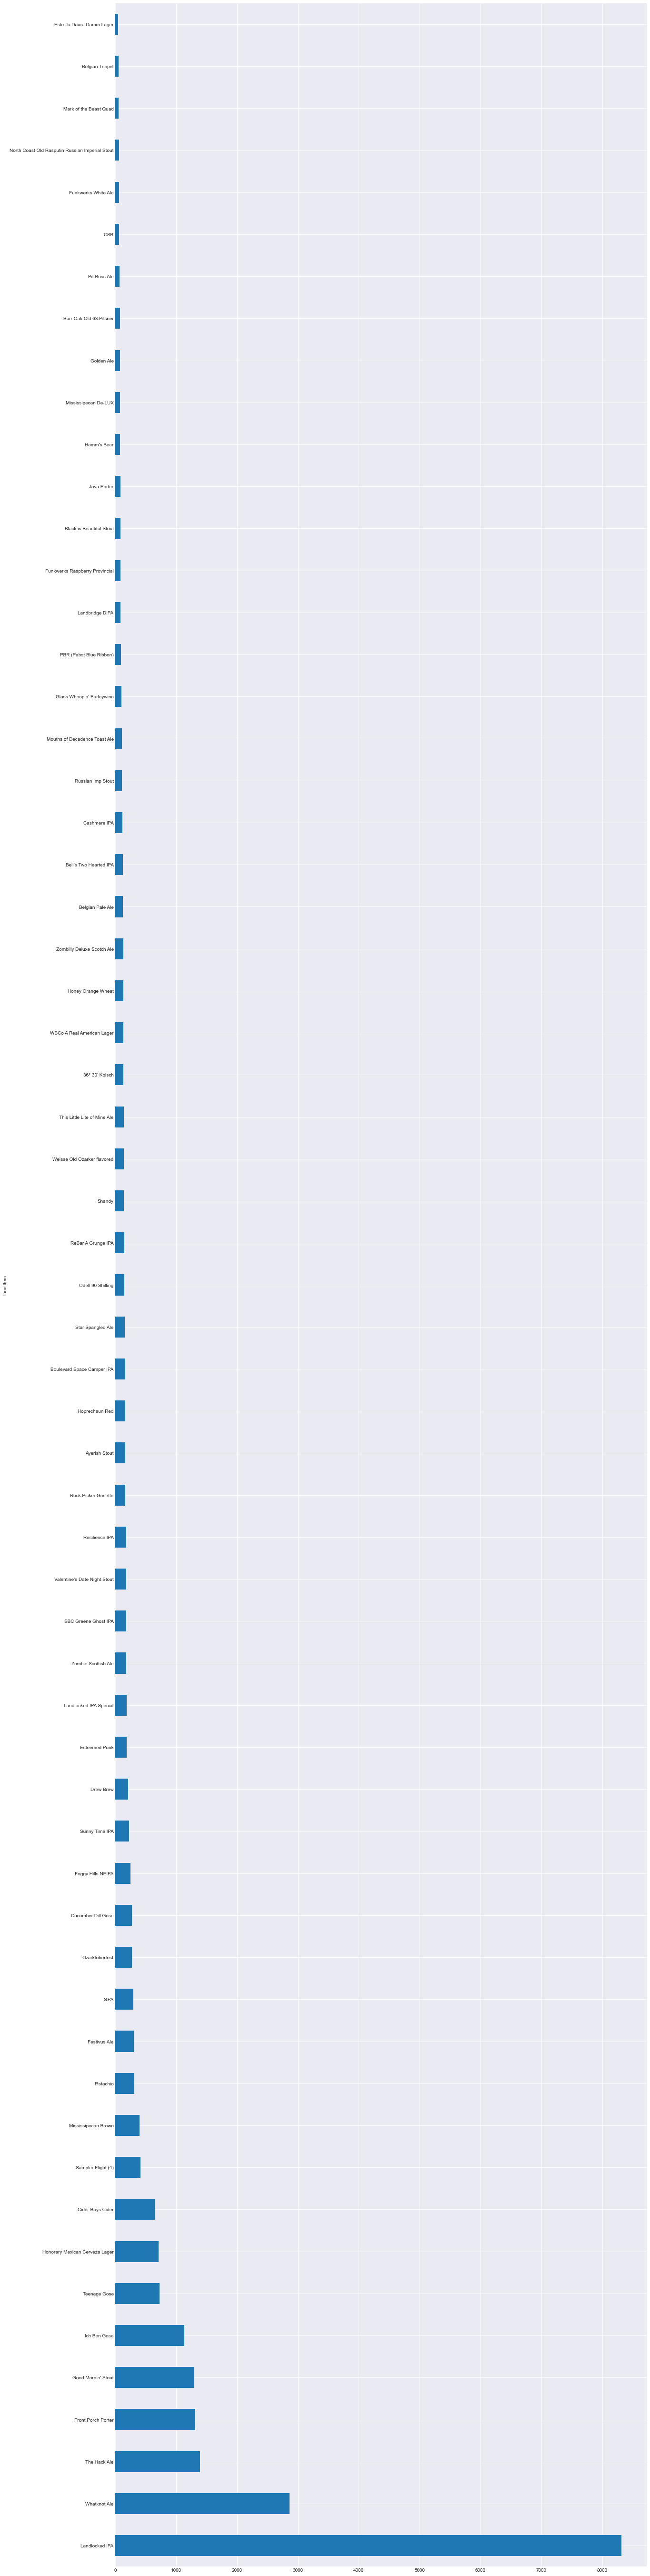

In [43]:
ax = beer_counts['Quantity'].plot.barh(figsize=(20,len(beers)), grid=True, sort_columns=True)

###### Graphing each beer on its own

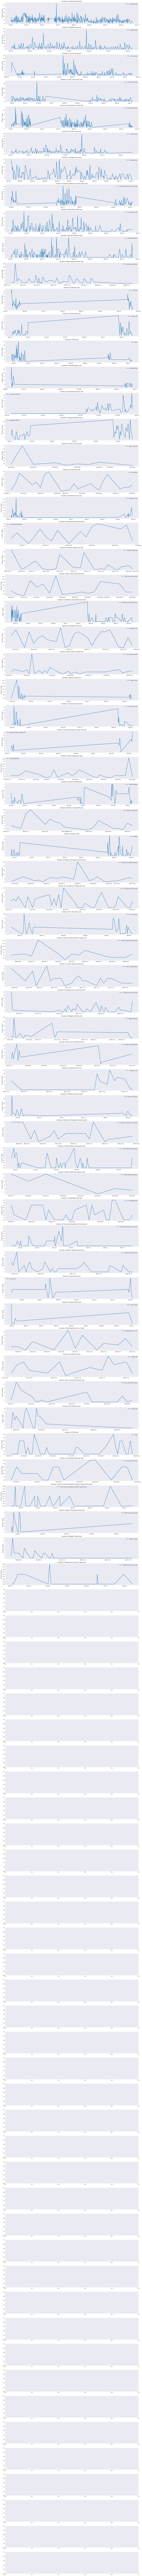

In [31]:

# So then we graph each beer on its own. 99 beers. Let's go!

# First we try to plot by beer, but the graph is too messy to tell anything.
fig, ax = plt.subplots(len(beers),1, figsize=(20,4*len(beers)))
i= 0
for beer in beer_counts.index:
    this_beer = beer_transactions[beer_transactions["Line Item"] == beer]
    sales_by_hour = this_beer.groupby(this_beer["time_hour"].dt.date).count()
    
    this_beer.head(2)
    ax[i].plot("Quantity", data=sales_by_hour, linewidth=2, alpha=1, label=beer)

    ax[i].set_title(f"Number of { beer } sold.")
    ax[i].set_ylabel("Number of Sales")
    ax[i].legend()

    i += 1

## If I don't look at it as a time series, and instead look at other characteristics

<AxesSubplot:>

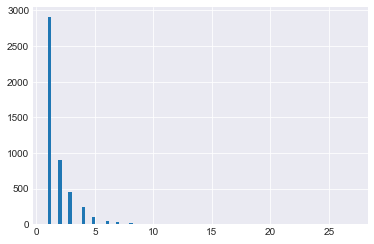

In [32]:
beer_transactions[beer_transactions["Line Item"] == "Landlocked IPA"]['Quantity'].hist(bins = 90)

<AxesSubplot:>

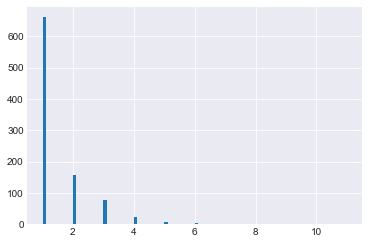

In [33]:
beer_transactions[beer_transactions["Line Item"] == "The Hack Ale"]['Quantity'].hist(bins = 90)

<AxesSubplot:>

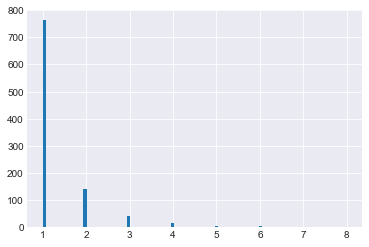

In [34]:
beer_transactions[beer_transactions["Line Item"] == "Good Mornin' Stout"]['Quantity'].hist(bins = 90)

In [110]:
major_beer_counts = beer_counts[beer_counts['Quantity'] > 710]
minor_beer_counts = beer_counts[beer_counts['Quantity'] < 710]

In [111]:
major_beer_counts.head(7)

,Unnamed: 0,Cost,Price,Quantity,Modifiers,Subtotal,Discounts,Net Total,Tax,Total Due,Customer ID
Line Item,,,,,,,,,,,
Landlocked IPA,32452254,4177.08,24223.0,8317.0,242.75,43238.75,6147.49,37091.26,0.0,37091.26,66058027216
Whatknot Ale,17257840,1128.40,8060.0,2866.0,82.50,11514.50,793.08,10721.42,0.0,10721.42,28422636678
The Hack Ale,5395637,522.48,3973.0,1391.0,606.50,6516.00,408.84,6107.16,0.0,6107.16,13450812740
Front Porch Porter,5243560,812.28,4835.0,1311.0,642.75,7187.75,887.45,6300.30,0.0,6300.30,13728765659
Good Mornin' Stout,7850189,601.40,4892.0,1298.0,623.00,7161.00,902.33,6258.67,0.0,6258.67,14099048399
Ich Ben Gose,7109733,637.26,4902.0,1133.0,-2.50,6771.50,804.26,5967.24,0.0,5967.24,11702847009
Teenage Gose,2111897,371.33,3399.5,728.0,950.26,5682.26,357.59,5324.67,0.0,5324.67,7531447961


In [112]:
minor_beer_counts.shape
minor_beer_counts.head(10)

,Unnamed: 0,Cost,Price,Quantity,Modifiers,Subtotal,Discounts,Net Total,Tax,Total Due,Customer ID
Line Item,,,,,,,,,,,
Cider Boys Cider,3695520,556.60,2420.0,649.0,115.00,3340.00,192.52,3147.48,0.0,3147.48,6948105857
Sampler Flight (4),2431934,0.00,2888.0,417.0,0.00,3336.00,106.42,3229.58,0.0,3229.58,5751163739
Mississipecan Brown,1097876,170.85,1530.0,399.0,49.25,2443.25,106.66,2336.59,0.0,2336.59,3752722093
Pistachio,1022603,227.55,1265.5,308.0,228.80,2136.80,119.47,2017.33,0.0,2017.33,2903274200
Festivus Ale,2123703,163.20,1254.0,301.0,36.75,1752.75,131.88,1620.87,0.0,1620.87,3216682866
SiPA,1179079,154.66,1092.0,293.0,75.25,1625.25,303.13,1322.12,0.0,1322.12,2970730483
Ozarktoberfest,412838,157.50,1090.5,275.0,230.00,1945.50,208.51,1736.99,0.0,1736.99,2580148528
Cucumber Dill Gose,1373991,156.80,1203.0,273.0,-15.75,1583.25,310.29,1272.96,0.0,1272.96,2778077533
Foggy Hills NEIPA,2141982,222.29,1271.0,247.0,-103.25,1482.25,372.55,1109.70,0.0,1109.70,2691112575


In [113]:
black_list = [
    'Cider Boys Cider',
    'Sampler Flight (4)',
    'Foggy Hills NEIPA',
    'SBC Greene Ghost IPA',
    "Bell's Two Hearted IPA",
    "Hamm's Beer",
    'Boulevard Space Camper IPA',
    'Odell 90 Shilling',
    'PBR (Pabst Blue Ribbon)',
    'North Coast Old Rasputin Russian Imperial Stout',
    'Burr Oak Old 63 Pilsner',
    'Estrella Daura Damm Lager',
    'Funkwerks Raspberry Provincial',
    'Funkwerks White Ale',
]
for black in black_list:
    minor_beer_counts = minor_beer_counts.drop(index=black)


In [83]:
minor_beer_counts.index

Index(['Mississipecan Brown', 'Pistachio', 'Festivus Ale', 'SiPA',
       'Ozarktoberfest', 'Cucumber Dill Gose', 'Sunny Time IPA', 'Drew Brew',
       'Esteemed Punk', 'Landlocked IPA Special', 'Zombie Scottish Ale',
       'Valentine's Date Night Stout', 'Resilience IPA',
       'Rock Picker Grisette', 'Ayerish Stout', 'Hoprechaun Red',
       'Star Spangled Ale', 'ReBar A Grunge IPA', 'Shandy',
       'Weisse Old Ozarker flavored', 'This Little Lite of Mine Ale',
       '36° 30’ Kolsch', 'WBCo A Real American Lager', 'Honey Orange Wheat',
       'Zombilly Deluxe Scotch Ale', 'Belgian Pale Ale', 'Cashmere IPA',
       'Russian Imp Stout', 'Mouths of Decadence Toast Ale',
       'Glass Whoopin' Barleywine', 'Landbridge DIPA',
       'Black is Beautiful Stout', 'Java Porter', 'Hamm's Beer',
       'Mississipecan De-LUX', 'Golden Ale', 'Pit Boss Ale', 'OSB',
       'Mark of the Beast Quad', 'Belgian Trippel'],
      dtype='object', name='Line Item')

In [86]:
minor_beer_counts.to_csv('../data/minor_beer_totals.csv')

In [118]:
# Just doing this so I can get the column names right without hard coding. Then I drop all rows.
minor_beer_sales = beer_transactions[beer_transactions['Line Item'] == 'Pit Boss Ale']
minor_beer_sales = minor_beer_sales.iloc[0:0]

for beer in minor_beer_counts.index:
    minor_beer_sales = minor_beer_sales.append(beer_transactions[beer_transactions['Line Item'] == beer])

minor_beer_sales = minor_beer_sales[minor_beer_sales["Operation Type"] == 'SALE']
cols_to_drop = ["UPC",  "Supplier Code", "Unnamed: 0", "Register Name/Number", "Store Code", "Operation Type", "Department", "Supplier"]
minor_beer_sales.drop(cols_to_drop, inplace=True, axis=1)
minor_beer_sales.head(3)

,Line Item,Cost,Price,Quantity,Modifiers,Subtotal,Discounts,Net Total,Tax,Total Due,Transaction ID,Customer ID,time_hour,Time2,Time
Time,,,,,,,,,,,,,,,
2020-01-01 00:54:00,Mississipecan Brown,0.67,6.0,5.0,0.0,30.0,0.0,30.0,0.0,30.0,C806F59B-13E5-4551-8AA8-AAE11F0914DC,13685111,2020-01-01 01:00:00,2020-01-01 00:54:00,2020-01-01 00:54:00
2020-01-01 00:18:00,Mississipecan Brown,0.67,6.0,1.0,0.0,6.0,0.0,6.0,0.0,6.0,40992540-7C50-46C9-89B2-90CB0E1C630A,13685111,2020-01-01 00:00:00,2020-01-01 00:18:00,2020-01-01 00:18:00
2020-01-01 00:16:00,Mississipecan Brown,0.67,6.0,1.0,0.0,6.0,3.0,3.0,0.0,3.0,C9EC9193-D293-4CA4-9C16-5025FC750817,13685111,2020-01-01 00:00:00,2020-01-01 00:16:00,2020-01-01 00:16:00


In [119]:
minor_beer_sales.to_csv('../data/minor_beer_sales.csv')